In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats

# File to Load
xlsx = "./states_and_coefs.xlsx"

# Read Data File and store into Pandas Data Frames
df1 = pd.read_excel(xlsx, "state_data")
df2 = pd.read_excel(xlsx, "qoi_coefs")
coef = pd.DataFrame(df2)

In [2]:
# Define variables 
states = df1['State']
population = df1['total_pop']
unemployment_rate = df1['unemployment_rate']/100
life_expec = df1['overall_life_expec']
divorce_rate = df1['Divorce_rate']
ea_high_school = df1['high_scool_percent']/100
ea_college = df1 ['college_percent']/100
gdp = df1['GDP']
pol_freedom = df1['Politcial_freedom']
latitude = df1['Latitude']
religion = df1['percent_religious']
earning_ratio = df1['earning_ratio_gender']
political_freedom = df1['human_freedom']

df_formatted = pd.DataFrame(
                {'States' : states,
                'Populations': population,
                'GDP per person': gdp,
                "High Scool Grad" : ea_high_school,
                "College Grad" : ea_college,
                'Life Expectancy': life_expec,
                'Political Freedom': pol_freedom,
                'Job Security (Unemployment %age)':unemployment_rate,
                'Divorce Rate': divorce_rate,
                'Climate': latitude,
                'Political Stability' : political_freedom,
                'Gender equality' : earning_ratio,
                'Community Life' : religion})
df_formatted.head()

,States,Populations,GDP per person,High Scool Grad,College Grad,Life Expectancy,Political Freedom,Job Security (Unemployment %age),Divorce Rate,Climate,Political Stability,Gender equality,Community Life
0,Alabama,4874747,37508,0.821,0.219,75.35,1.5,0.058,3.7,32.806671,8.39,0.760,0.77
1,Alaska,739795,63610,0.910,0.279,78.05,1.5,0.076,3.6,61.370716,8.39,0.768,0.45
2,Arizona,7016270,39583,0.856,0.259,80.00,1.5,0.058,3.5,33.729759,8.39,0.818,0.53
3,Arkansas,3004279,36714,0.829,0.195,76.05,1.5,0.056,3.7,34.969704,8.39,0.750,0.70
4,California,39536653,60359,0.807,0.301,80.45,1.5,0.059,5.5,36.116203,8.39,0.840,0.49


In [3]:
max(df_formatted["Divorce Rate"])

5.5

In [4]:
min(df_formatted["Divorce Rate"])

1.9

In [5]:
# Not sure what this number is or why its here
2.62

2.62

In [6]:
# Calculating "Family Life" : divorce rate index 
# Bins
divorce_bins = [1.8, 2.62, 3.34, 4.06, 4.78, 5.6]
group_names = ["1", "2", "3", "4", "5"]

# Rename dataframe
bin_pd = df_formatted

# Segment and sort data into buckets by Per Student Budget
bin_pd["Divorce Rate I"] = pd.cut(bin_pd["Divorce Rate"], divorce_bins, labels=group_names)

In [7]:
#df_new = bin_pd.drop(columns=['Divorce Rate'])
df_new1 = pd.DataFrame(bin_pd)
df_new1.sort_values("Job Security (Unemployment %age)", axis=0, ascending=True)

,States,Populations,GDP per person,High Scool Grad,College Grad,Life Expectancy,Political Freedom,Job Security (Unemployment %age),Divorce Rate,Climate,Political Stability,Gender equality,Community Life,Divorce Rate I
34,North Dakota,755393,64911,0.903,0.276,79.35,1.5,0.029,2.5,47.528912,8.39,0.758,0.53,1
27,Nebraska,1920076,54654,0.904,0.286,79.50,1.5,0.033,3.0,41.125370,8.39,0.731,0.54,2
26,Montana,1050493,39833,0.917,0.288,78.55,1.5,0.035,3.1,46.921925,8.39,0.752,0.48,2
41,South Dakota,869666,48004,0.896,0.263,79.60,1.5,0.035,2.7,44.299782,8.39,0.769,0.59,2
49,Wisconsin,5795483,48666,0.901,0.263,79.90,1.5,0.035,2.4,44.268543,8.39,0.783,0.45,1
23,Minnesota,5576606,54805,0.918,0.318,80.90,1.5,0.036,3.2,45.694454,8.39,0.800,0.49,2
44,Utah,3101833,45493,0.906,0.293,80.50,1.5,0.036,3.4,40.150032,8.39,0.700,0.64,3
15,Iowa,3145711,52284,0.906,0.249,79.45,1.5,0.036,2.0,42.011539,8.39,0.778,0.55,1
45,Vermont,623657,44831,0.910,0.336,80.60,1.5,0.038,2.9,44.045876,8.39,0.864,0.34,2
29,New Hampshire,1342795,52509,0.915,0.328,80.55,1.5,0.038,3.1,43.452492,8.39,0.769,0.33,2


In [8]:
coef

,weight,coef
0,Constant,2.79590
1,GDP,0.00003
2,Life_expectancy,0.04480
3,political_freedom,-0.10520
4,Job_security,-0.02170
5,Family_life,-0.18780
6,Climate,-1.35340
7,Political_stability,0.15190
8,Gender,0.74230
9,Community_life,0.38650


In [9]:
# Defining variable coefficients
constant = coef.iloc[0]["coef"]
gdp_coef = coef.iloc[1]["coef"]
life_coef = coef.iloc[2]["coef"]
polF_coef = coef.iloc[3]["coef"]
job_coef = coef.iloc[4]["coef"]
fam_coef = coef.iloc[5]["coef"]
clim_coef = coef.iloc[6]["coef"]
polS_coef = coef.iloc[7]["coef"]
genderE_coef = coef.iloc[8]["coef"]
community_coef = coef.iloc[9]["coef"]

QOL = constant + (gdp_coef * df_new1["GDP per person"])\
               + (life_coef * df_new1["Life Expectancy"]) +  (polF_coef * df_new1["Political Freedom"])\
               + (job_coef * df_new1["Job Security (Unemployment %age)"]) + (fam_coef * df_new1["Divorce Rate I"].astype(int))\
               + (genderE_coef * df_new1["Gender equality"])+ (genderE_coef * df_new1["Gender equality"])\
               +(community_coef * df_new1["Community Life"]) + (clim_coef * stats.zscore(df_new1["Climate"]))
QOL

0      9.499684
1      3.858863
2      9.555720
3      8.978249
4      9.303311
5      8.924673
6      8.568865
7      9.153308
8     12.315380
9     10.926549
10     9.846088
11    12.835079
12     6.972688
13     8.820091
14     8.368505
15     8.371470
16     8.961401
17     8.454536
18    10.301916
19     7.189556
20     9.253750
21     8.748325
22     7.570402
23     7.504336
24     9.521751
25     8.657969
26     6.598364
27     8.383000
28     8.398564
29     7.816761
30     8.948849
31     9.506945
32     8.683160
33     9.434977
34     7.466013
35     8.341998
36     8.931835
37     7.433967
38     8.594041
39     8.197091
40     9.753372
41     7.548796
42     9.185623
43    10.867777
44     8.177379
45     7.599933
46     9.140676
47     6.974123
48     8.052352
49     7.743605
50     7.889727
dtype: float64

In [10]:
from scipy.stats import stats

In [11]:
np.mean(QOL)

8.66924297254902

In [12]:
# Rename dataframe, add QOL and sort by QOL
df_new1["QOL"]=QOL
final_df = df_new1
final_df["High Scool Grad"] = final_df["High Scool Grad"] * 100
final_df["College Grad"] = final_df["College Grad"] * 100
final_df["Community Life"] = final_df["Community Life"] * 100
final_df["Gender equality"] = final_df["Gender equality"] * 100
final_df.sort_values(by='QOL', ascending=False)

,States,Populations,GDP per person,High Scool Grad,College Grad,Life Expectancy,Political Freedom,Job Security (Unemployment %age),Divorce Rate,Climate,Political Stability,Gender equality,Community Life,Divorce Rate I,QOL
11,Hawaii,1427538,52869,89.9,29.5,80.80,1.5,0.042,3.5,21.094318,8.39,83.3,47.0,3,12.835079
8,District of Columbia,693972,159607,87.4,50.1,77.10,1.5,0.066,2.5,38.897438,8.39,87.0,53.0,1,12.315380
9,Florida,20984400,39842,85.5,25.8,79.30,1.5,0.055,3.6,27.766279,8.39,85.0,54.0,3,10.926549
43,Texas,28304596,53737,80.7,25.9,78.35,1.5,0.051,2.2,31.054487,8.39,77.8,64.0,1,10.867777
18,Louisiana,4684333,44372,81.9,21.4,75.65,1.5,0.065,1.9,31.169546,8.39,66.7,71.0,1,10.301916
10,Georgia,10429379,45925,84.3,27.3,77.45,1.5,0.058,3.5,33.040619,8.39,82.4,66.0,3,9.846088
40,South Carolina,5024369,37637,84.1,24.5,77.10,1.5,0.058,2.6,33.856892,8.39,80.0,70.0,1,9.753372
2,Arizona,7016270,39583,85.6,25.9,80.00,1.5,0.058,3.5,33.729759,8.39,81.8,53.0,3,9.555720
24,Mississippi,2984100,32447,81.0,19.5,75.05,1.5,0.070,2.9,32.741646,8.39,75.0,77.0,2,9.521751
31,New Mexico,2088070,41619,83.3,25.0,78.30,1.5,0.066,3.2,34.840515,8.39,82.7,57.0,2,9.506945


In [13]:
# create head dataframe, add QOL and sort by QOL
final_df["QOL"]=QOL
final_top_df = final_df
final_top_df.sort_values(by='QOL', ascending=False).head()

,States,Populations,GDP per person,High Scool Grad,College Grad,Life Expectancy,Political Freedom,Job Security (Unemployment %age),Divorce Rate,Climate,Political Stability,Gender equality,Community Life,Divorce Rate I,QOL
11,Hawaii,1427538,52869,89.9,29.5,80.80,1.5,0.042,3.5,21.094318,8.39,83.3,47.0,3,12.835079
8,District of Columbia,693972,159607,87.4,50.1,77.10,1.5,0.066,2.5,38.897438,8.39,87.0,53.0,1,12.315380
9,Florida,20984400,39842,85.5,25.8,79.30,1.5,0.055,3.6,27.766279,8.39,85.0,54.0,3,10.926549
43,Texas,28304596,53737,80.7,25.9,78.35,1.5,0.051,2.2,31.054487,8.39,77.8,64.0,1,10.867777
18,Louisiana,4684333,44372,81.9,21.4,75.65,1.5,0.065,1.9,31.169546,8.39,66.7,71.0,1,10.301916


In [14]:
# create bottom dataframe, add QOL and sort by QOL
df_new1["QOL"]=QOL
final_bottom_df = df_new1
final_bottom_df.sort_values(by='QOL', ascending=False).tail()

,States,Populations,GDP per person,High Scool Grad,College Grad,Life Expectancy,Political Freedom,Job Security (Unemployment %age),Divorce Rate,Climate,Political Stability,Gender equality,Community Life,Divorce Rate I,QOL
19,Maine,1335907,39521,90.3,26.8,79.15,1.5,0.042,3.2,44.693947,8.39,83.7,34.0,2,7.189556
47,Washington,7405743,59333,89.8,31.1,79.85,1.5,0.049,3.4,47.400902,8.39,77.9,45.0,3,6.974123
12,Idaho,1716943,36441,88.3,24.4,79.70,1.5,0.041,3.9,44.240459,8.39,75.0,51.0,3,6.972688
26,Montana,1050493,39833,91.7,28.8,78.55,1.5,0.035,3.1,46.921925,8.39,75.2,48.0,2,6.598364
1,Alaska,739795,63610,91.0,27.9,78.05,1.5,0.076,3.6,61.370716,8.39,76.8,45.0,3,3.858863


In [15]:
# Output the .csv
final_df.to_csv("education_df_output_csv.csv", sep=',', header=True)

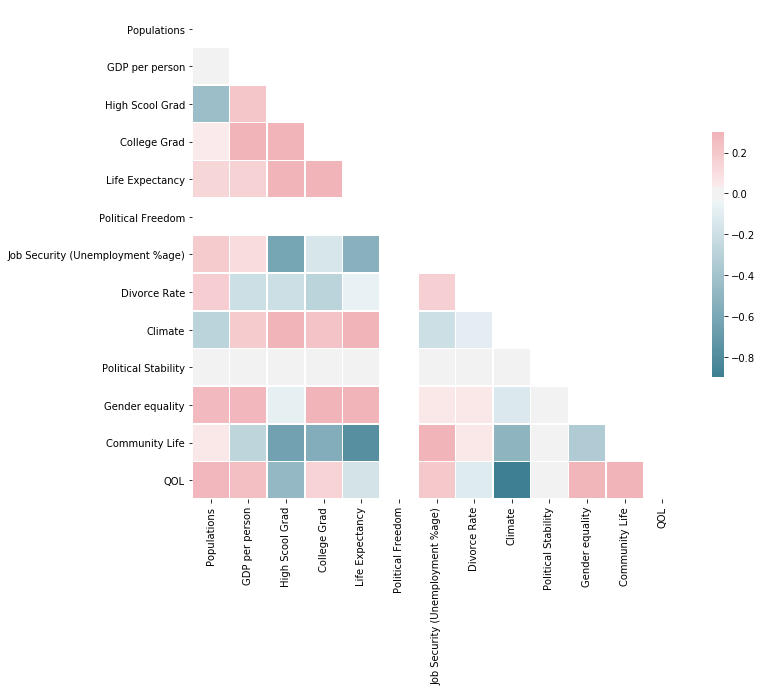

In [16]:
corr = final_df.corr()
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig("corr_heatmap.png")

In [17]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 15 columns):
States                              51 non-null object
Populations                         51 non-null int64
GDP per person                      51 non-null int64
High Scool Grad                     51 non-null float64
College Grad                        51 non-null float64
Life Expectancy                     51 non-null float64
Political Freedom                   51 non-null float64
Job Security (Unemployment %age)    51 non-null float64
Divorce Rate                        51 non-null float64
Climate                             51 non-null float64
Political Stability                 51 non-null float64
Gender equality                     51 non-null float64
Community Life                      51 non-null float64
Divorce Rate I                      51 non-null category
QOL                                 51 non-null float64
dtypes: category(1), float64(11), int64(2), object(1)
memory 

In [18]:
import statsmodels.api as sm # import statsmodels 

pvalues = []
variables = []

# OLS Regression analysis

x = final_df["QOL"] ## X usually means our input variables (or independent variables)
y = final_df["Gender equality"] ## Y usually means our output/dependent variable
X = sm.add_constant(x) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
print(model.summary())
#print(model.pvalues["Gender equality"])

#pvalues.append(model.pvalues["Gender equality"])
#variables.append("Gender equality")

# Save Figure
#savefig("./Images/Regression_Results.png")

                            OLS Regression Results                            
Dep. Variable:        Gender equality   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     4.409
Date:                Sat, 30 Mar 2019   Prob (F-statistic):             0.0409
Time:                        20:16:26   Log-Likelihood:                -149.92
No. Observations:                  51   AIC:                             303.8
Df Residuals:                      49   BIC:                             307.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.3254      4.139     16.991      0.0

In [19]:
import statsmodels.api as sm # import statsmodels 

pvalues = []
variables = ['Populations', 'GDP per person','Life Expectancy', 'Political Freedom',
       'Job Security (Unemployment %age)', 'Divorce Rate', 'Climate', 'Political Stability',
       'Gender equality', 'Community Life', 'QOL']

for category in variables:    
    # OLS Regression analysis
    x = final_df[category] ## X usually means our input variables (or independent variables)
    y = final_df["College Grad"] ## Y usually means our output/dependent variable
    X = sm.add_constant(x) ## let's add an intercept (beta_0) to our model

    # Note the difference in argument order
    model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
    predictions = model.predict(X)

    # Print out the statistics
    #print(model.summary())
    #print(model.pvalues["QOL"])

    pvalues.append(model.pvalues[category])
    #variables.append("QOL")
print(variables)
print(pvalues)

['Populations', 'GDP per person', 'Life Expectancy', 'Political Freedom', 'Job Security (Unemployment %age)', 'Divorce Rate', 'Climate', 'Political Stability', 'Gender equality', 'Community Life', 'QOL']
[0.8093664321058393, 1.9216100144757168e-10, 2.0933028985843047e-05, 9.594134394621913e-37, 0.28515222885035163, 0.04122863874752938, 0.11362078768433888, 9.594134394621639e-37, 0.0005353854634710408, 2.1425577927523504e-05, 0.29872300802754526]


In [20]:
pvalDF = pd.DataFrame()
pvalDF["Variables"] = variables
pvalDF["PValues"] = pvalues

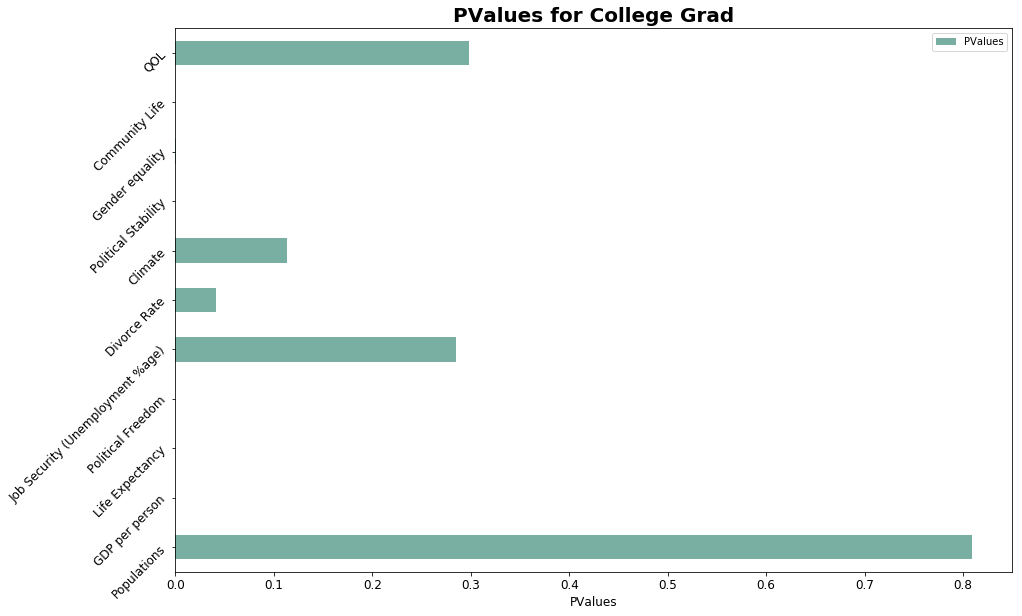

In [21]:
#Check College Education PValues
my_colors=[ '#79aea3']
ax=pvalDF.plot(kind="barh",figsize=(15,10),legend=True, fontsize=12, color=my_colors)
ax.set_title('PValues for College Grad',fontsize= 20, fontweight="bold")
ax.set_yticklabels(pvalDF.Variables, rotation=45)
ax.set_xlabel("PValues",fontsize=12)

# Save Figure
plt.savefig("./Images/College_Pvalues.png")

In [22]:
import statsmodels.api as sm # import statsmodels 

hs_pvalues = []
hs_variables = ['Populations', 'GDP per person','Life Expectancy', 'Political Freedom',
       'Job Security (Unemployment %age)', 'Divorce Rate', 'Climate', 'Political Stability',
       'Gender equality', 'Community Life', 'QOL']

for hs_category in hs_variables:    
    # OLS Regression analysis
    x = final_df[hs_category] ## X usually means our input variables (or independent variables)
    y = final_df["High Scool Grad"] ## Y usually means our output/dependent variable
    X = sm.add_constant(x) ## let's add an intercept (beta_0) to our model

    # Note the difference in argument order
    model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
    predictions = model.predict(X)

    # Print out the statistics
    #print(model.summary())
    #print(model.pvalues["QOL"])

    hs_pvalues.append(model.pvalues[hs_category])
    #variables.append("QOL")
print(hs_variables)
print(hs_pvalues)

['Populations', 'GDP per person', 'Life Expectancy', 'Political Freedom', 'Job Security (Unemployment %age)', 'Divorce Rate', 'Climate', 'Political Stability', 'Gender equality', 'Community Life', 'QOL']
[0.0012618003119584996, 0.14094999977721862, 3.7564286954625695e-06, 5.766460453990436e-73, 1.1667518262561632e-06, 0.1654702920058187, 2.613140070931755e-06, 5.766460453990436e-73, 0.5841800996012285, 3.2663606033600746e-07, 0.00044324842337016215]


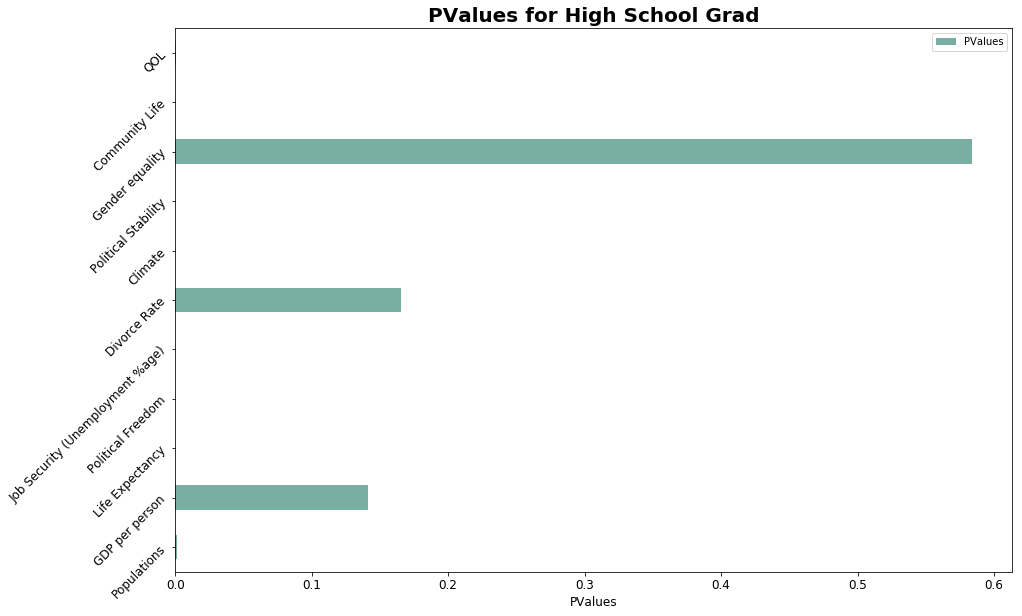

In [23]:
hs_pvalDF = pd.DataFrame()
hs_pvalDF["Variables"] = hs_variables
hs_pvalDF["PValues"] = hs_pvalues

my_colors=[ '#79aea3']
ax=hs_pvalDF.plot(kind="barh",figsize=(15,10),legend=True, fontsize=12, color=my_colors)
ax.set_title('PValues for High School Grad',fontsize= 20, fontweight="bold")
ax.set_yticklabels(hs_pvalDF.Variables, rotation=45)
ax.set_xlabel("PValues",fontsize=12)


# Save Figure
plt.savefig("./Images/HS_Pvalues.png")

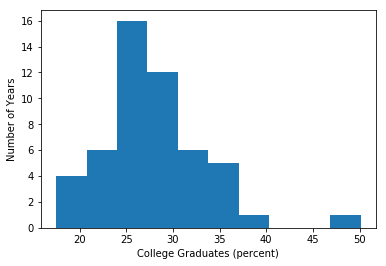

In [24]:
plt.hist(final_df["College Grad"])
plt.ylabel("Number of Years")
plt.xlabel("College Graduates (percent)")
plt.savefig("hist_coll_grad.png")

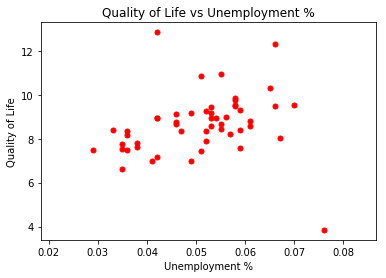

In [25]:
qol = final_df["QOL"]
unempl = final_df["Job Security (Unemployment %age)"]
plt.scatter(unempl,qol,s=25,color="red")
plt.ylabel("Quality of Life")
plt.xlabel("Unemployment %")
plt.title("Quality of Life vs Unemployment %")
plt.savefig("QolvUnempl.png")

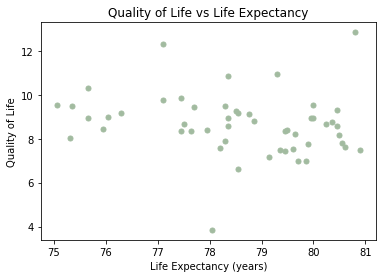

In [26]:

life_exp = final_df["Life Expectancy"]
plt.scatter(life_exp,qol,s=25,color="#a2bba0")
plt.ylabel("Quality of Life")
plt.xlabel("Life Expectancy (years)")
plt.title("Quality of Life vs Life Expectancy")

plt.savefig("QolvLifeExp.png")

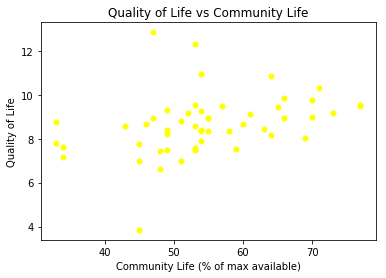

In [27]:
comm_life = final_df["Community Life"]
plt.scatter(comm_life,qol,s=25,color="yellow")
plt.ylabel("Quality of Life")
plt.xlabel("Community Life (% of max available)")
plt.title("Quality of Life vs Community Life")
plt.savefig("QolvCommLife.png")

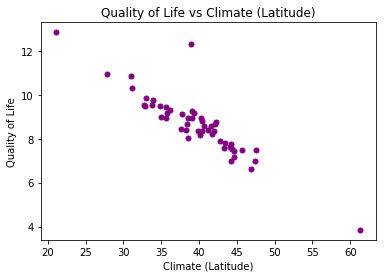

In [28]:
climate = final_df["Climate"]
plt.scatter(climate,qol,s=25,color="purple")
plt.ylabel("Quality of Life")
plt.xlabel("Climate (Latitude)")
plt.title("Quality of Life vs Climate (Latitude)")
plt.savefig("QolvClimate.png")

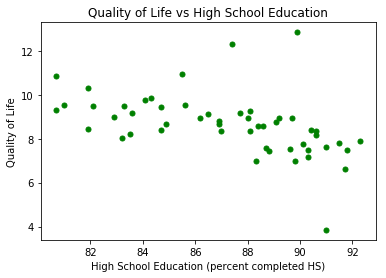

In [29]:
hseduc = final_df["High Scool Grad"]
plt.scatter(hseduc,qol,s=25,color="green")
plt.ylabel("Quality of Life")
plt.xlabel("High School Education (percent completed HS)")
plt.title("Quality of Life vs High School Education")
plt.savefig("QolvHSeduc.png")

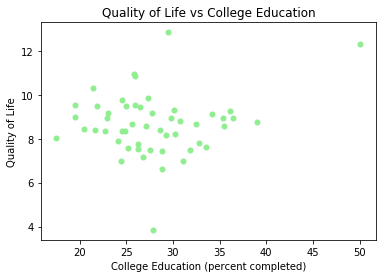

In [30]:
college_educ = final_df["College Grad"]
plt.scatter(college_educ,qol,s=25,color="lightgreen")
plt.ylabel("Quality of Life")
plt.xlabel("College Education (percent completed)")
plt.title("Quality of Life vs College Education")
plt.savefig("QolvColEduc.png")

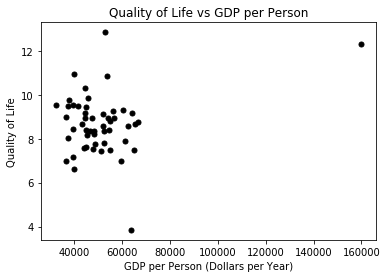

In [31]:
gdp_pp = final_df["GDP per person"]
plt.scatter(gdp_pp,qol,s=25,color="black")
plt.ylabel("Quality of Life")
plt.xlabel("GDP per Person (Dollars per Year)")
plt.title("Quality of Life vs GDP per Person")
plt.savefig("QolvGDP.png")

In [32]:
## Begin Jonas Choropeth...

In [33]:
#JH - Adding postal code for plotly map
final_df["postal"] = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']


In [34]:
#JH - Plotly Dependencies
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls

# If the map plot fails...
# Comment this next line
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# and uncomment this next line
#tls.set_credentials_file(username='jonas.haskins', api_key='oS0BOsrPdPS8HqyGao12')
# and that may causde it to owrk, but we don't know why

In [35]:
data = [dict(type='choropleth',autocolorscale=False, locations = final_df['postal'], z = final_df["QOL"],locationmode='USA-states', colorscale = 'Jet', colorbar = dict(title="Quality of Life Index"))]

In [36]:
layout = go.Layout(
    title = go.layout.Title(
        text = 'QoL by State'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

In [37]:
fig = dict(data=data, layout=layout)

In [38]:
py.iplot(fig, filename='d3-choropleth-map')
# plt.savefig("choropleth.png")

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jonas.haskins/0 or inside your plot.ly account where it is named 'd3-choropleth-map'


C:\Users\Michel Maniguet\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



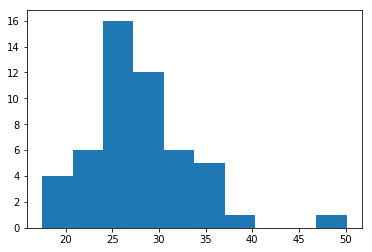

In [39]:
plt.hist(final_df["College Grad"])

# Save Figure
plt.savefig("./Images/College_hist.png")

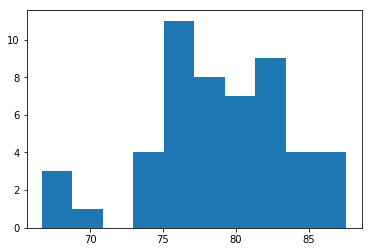

In [40]:
plt.hist(final_df["Gender equality"])

# Save Figure
plt.savefig("./Images/GenderEquality_hist.png")

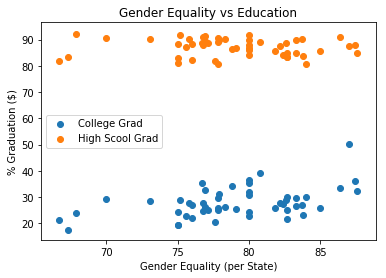

In [41]:
plt.scatter(final_df["Gender equality"], final_df["College Grad"])
plt.scatter(final_df["Gender equality"], final_df["High Scool Grad"])

#,final_df["High Scool Grad"]

plt.title('Gender Equality vs Education')
plt.xlabel('Gender Equality (per State)')
plt.ylabel('% Graduation ($)')
#plt.grid(True)


# Create a legend
plt.legend(loc="best")
# plt.show()

# Save Figure
plt.savefig("./Images/GendervsEducation_scatter.png")

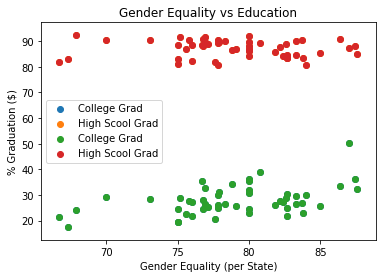

In [42]:
#with top_df
plt.scatter(final_top_df["Gender equality"], final_top_df["College Grad"])
plt.scatter(final_top_df["Gender equality"], final_top_df["High Scool Grad"])
plt.scatter(final_bottom_df["Gender equality"], final_bottom_df["College Grad"])
plt.scatter(final_bottom_df["Gender equality"], final_bottom_df["High Scool Grad"])


#,final_df["High Scool Grad"]

plt.title('Gender Equality vs Education')
plt.xlabel('Gender Equality (per State)')
plt.ylabel('% Graduation ($)')
#plt.grid(True)


# Create a legend
plt.legend(loc="best")
#plt.show()

# Save Figure
plt.savefig("./Images/GenderperEducation_scatter.png")

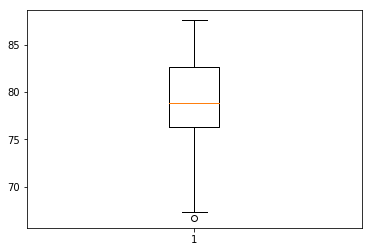

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
fig=plt.figure()
#ax = fig.add_subplot(1,1,1)
#bx = fig.add_subplot(1,1,1)
cx = fig.add_subplot(1,1,1)
#Variable
#ax.boxplot(final_df['College Grad'])
#bx.boxplot(final_df['High Scool Grad'])
cx.boxplot(final_df['Gender equality'])
plt.show()

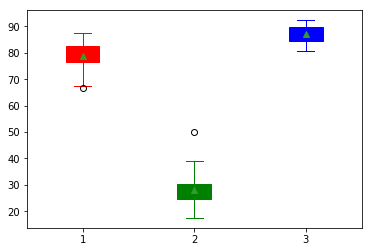

In [44]:
data = [final_df['Gender equality'],final_df['College Grad'],final_df['High Scool Grad']]
colors = ['red','green','blue']
fig, ax = plt.subplots()
box_dict = ax.boxplot(data, patch_artist=True,  showmeans=True)
for item in ['boxes', 'fliers', 'medians', 'means']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color)
# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color=color)
        

# Save Figure
plt.savefig("./Images/GendervsEducation_boxplt.png")

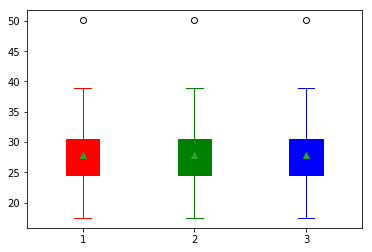

In [45]:
data = [final_df['College Grad'],final_top_df['College Grad'],final_bottom_df['College Grad']]
colors = ['red','green','blue']
fig, ax = plt.subplots()
box_dict = ax.boxplot(data, patch_artist=True,  showmeans=True)
for item in ['boxes', 'fliers', 'medians', 'means']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color)
# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color=color)
        
# Save Figure
plt.savefig("./Images/CollegevsallDF_boxplt.png")

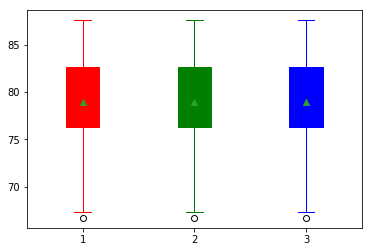

In [46]:
data = [final_df['Gender equality'],final_top_df['Gender equality'],final_bottom_df['Gender equality']]
colors = ['red','green','blue']
fig, ax = plt.subplots()
box_dict = ax.boxplot(data, patch_artist=True,  showmeans=True)
for item in ['boxes', 'fliers', 'medians', 'means']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color)
# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color=color)
        
# Save Figure
plt.savefig("./Images/GenderEQvsAllDF_boxplt.png")

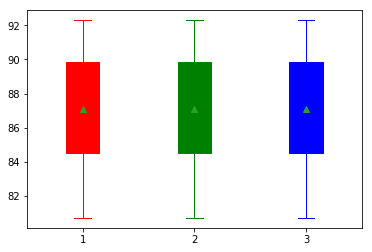

In [47]:
data = [final_df['High Scool Grad'],final_top_df['High Scool Grad'],final_bottom_df['High Scool Grad']]
colors = ['red','green','blue']
fig, ax = plt.subplots()
box_dict = ax.boxplot(data, patch_artist=True,  showmeans=True)
for item in ['boxes', 'fliers', 'medians', 'means']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color)
# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color=color)
        
# Save Figure
plt.savefig("./Images/HSvsAllDF_boxplt.png")

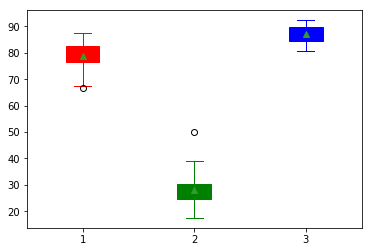

In [48]:
data = [final_top_df['Gender equality'],final_top_df['College Grad'],final_top_df['High Scool Grad']]
colors = ['red','green','blue']
fig, ax = plt.subplots()
box_dict = ax.boxplot(data, patch_artist=True,  showmeans=True)
for item in ['boxes', 'fliers', 'medians', 'means']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color)
# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color=color)
        
# Save Figure
plt.savefig("./Images/GenderEQvstopdf_boxplt.png")

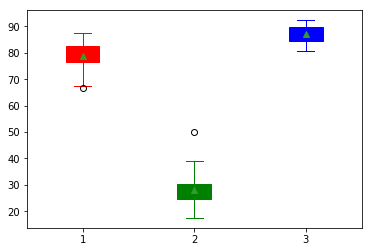

In [49]:
data = [final_bottom_df['Gender equality'],final_bottom_df['College Grad'],final_bottom_df['High Scool Grad']]
colors = ['red','green','blue']
fig, ax = plt.subplots()
box_dict = ax.boxplot(data, patch_artist=True,  showmeans=True)
for item in ['boxes', 'fliers', 'medians', 'means']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color)
# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color=color)
        
# Save Figure
plt.savefig("./Images/GenderEQvsbottomdf_boxplt.png")   

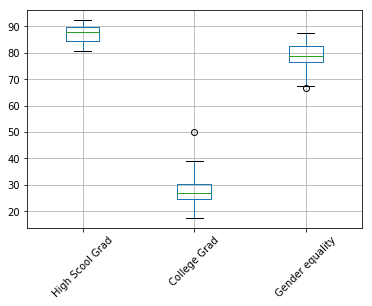

In [50]:
final_df.boxplot(column=['High Scool Grad','College Grad', 'Gender equality'],rot=45)

# Save Figure
plt.savefig("./Images/GendervsEducation_boxplt2.png")

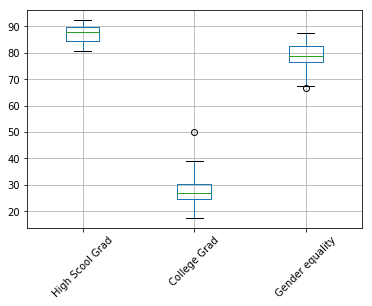

In [51]:
final_top_df.boxplot(column=['High Scool Grad','College Grad', 'Gender equality'],rot=45)

# Save Figure
plt.savefig("./Images/GendervsEducation_boxplt_topdf.png")

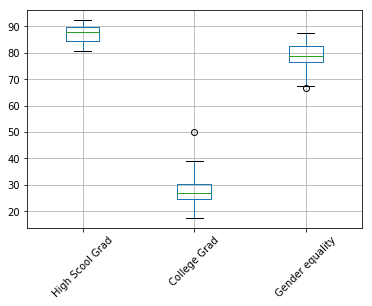

In [52]:
final_bottom_df.boxplot(column=['High Scool Grad','College Grad', 'Gender equality'],rot=45)

# Save Figure
plt.savefig("./Images/GendervsEducation_boxplt_bottomdf.png")